# Cat Foods
***
The mission is to find a list of foods that meet the parameters for my cat.

This is what I have gathered from my subject matter expert so far:

* The foods must have carbohydrate content of less than or equal to 7%
* It is best to seek high protien content

I have full unlimited access to my SME as she is my wife, so I'm going to wrangle the data, and get a few different data frames containing all the relevant information.

The first task is to find out how many foods meet this standard if any at all before doing hours of work.

# Preparing for data exploatory analysis
***

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Storing data in data frame
data = pd.read_csv("C:/Users/there/Desktop/Cat Foods Project/Cat Food Protein-Fat-Carb-Phosphorus - Data.csv",encoding='utf-8')

# Creating a copy to work with
df = data

# Exploratory analysis
***

In [3]:
# Taking a look at the first few rows of data
df.head()

,COMPANY,FLAVOR/STYLE,PROTEIN %,FAT %,CARB %,Unnamed: 5,mg PHOS/100 kcals,Unnamed: 7,"CAT FOOD - NUTRITIONAL COMPOSITION\nData compiled by Lisa A. Pierson, DVM Typical nutrient analysis data provided by the respective companies Wet only - no dry food is listed TERMS OF USE: Linking to this proprietary work is welcomed. However, re-posting or re-publishing this chart on any other public platform or website is expressly forbidden. You may link to it or download and utilize for your own personal use only."
0,WELLNESS DIVINE DUOS,Beef Pate & Diced Chicken Liver,21,64,14,NaN,112,NaN,NaN
1,WELLNESS DIVINE DUOS,Chicken Pate & Diced Duck,21,64,14,NaN,140,NaN,NaN
2,HILL’S,k/d with Chicken,22,51,27,NaN,85,NaN,"""prescription"" diet"
3,WELLNESS DIVINE DUOS,Chicken Pate & Diced Turkey,22,61,16,NaN,140,NaN,NaN
4,WELLNESS DIVINE DUOS,Tilapia Pate & Diced Ahi Tuna,23,62,15,NaN,206,NaN,NaN


## Observation 1: Unclean Data
***
* We have line breaks in the first column
* The last column contains what appears to be the footer of the data
* Columns 5 and 7 look empty
* The last column contains some text
  * After looking at the csv file in Excel, I see that there are categorical entries such as "prescription" as well as notes left by the author of the data source.
***

In [4]:
# Statistical Summary
df.describe(include='all')

,COMPANY,FLAVOR/STYLE,PROTEIN %,FAT %,CARB %,Unnamed: 5,mg PHOS/100 kcals,Unnamed: 7,"CAT FOOD - NUTRITIONAL COMPOSITION\nData compiled by Lisa A. Pierson, DVM Typical nutrient analysis data provided by the respective companies Wet only - no dry food is listed TERMS OF USE: Linking to this proprietary work is welcomed. However, re-posting or re-publishing this chart on any other public platform or website is expressly forbidden. You may link to it or download and utilize for your own personal use only."
count,1168,1167,1125,1125,1125,0.0,1120,0.0,82
unique,184,903,68,66,44,NaN,331,NaN,10
top,Royal Canin,Chicken,37,58,13,NaN,250,NaN,"""prescription"" diet"
freq,40,40,75,46,77,NaN,16,NaN,64
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 9 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                    

In [6]:
# Data types
df.dtypes

COMPANY                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               object
FLAVOR/STYLE                                                                                                                                                                                               

## Observation 2: Fixing Headers
***
I need to drop the empty columns,fix the headers, and fill null values in the last column.
***

In [7]:
# Dropping empty columns
columns_to_drop = df.columns[[5,7]]
df.drop(columns=columns_to_drop,inplace=True)

In [8]:
# Fixing column headers
df.columns = ['Company','Flavor/Style','Protein (%)','Fat (%)','Carb (%)','mg Phos/100 kcals','Prescription'] # Naming last column 'Prescription

In [9]:
# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription
0,WELLNESS DIVINE DUOS,Beef Pate & Diced Chicken Liver,21,64,14,112,NaN
1,WELLNESS DIVINE DUOS,Chicken Pate & Diced Duck,21,64,14,140,NaN
2,HILL’S,k/d with Chicken,22,51,27,85,"""prescription"" diet"
3,WELLNESS DIVINE DUOS,Chicken Pate & Diced Turkey,22,61,16,140,NaN
4,WELLNESS DIVINE DUOS,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,NaN


In [10]:
# Filling NaN in 'Prescription'
df['Prescription'].fillna('N/A',inplace=True)

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription
0,WELLNESS DIVINE DUOS,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A
1,WELLNESS DIVINE DUOS,Chicken Pate & Diced Duck,21,64,14,140,N/A
2,HILL’S,k/d with Chicken,22,51,27,85,"""prescription"" diet"
3,WELLNESS DIVINE DUOS,Chicken Pate & Diced Turkey,22,61,16,140,N/A
4,WELLNESS DIVINE DUOS,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A


## Observation 3: Text Cleaning
***
It all looks as if it could use some cleaning up. General cleaning.
***

In [11]:
# Cleaning up any incorrect spacing
columns_to_strip = df.columns

for column in columns_to_strip:
  df[column] = df[column].str.strip()

# Cleaning up any really messy spacing: Stuff        like    this     .
df.replace(r'[\s]+',' ',inplace=True,regex=True)

# Making 'Company' look better
df['Company'] = df['Company'].str.lower().str.title()

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21,64,14,140,N/A
2,Hill’S,k/d with Chicken,22,51,27,85,"""prescription"" diet"
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22,61,16,140,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A


In [12]:
# Fixing formatting issue with 's
df['Company'] = df['Company'].str.replace("’S","'s") # Differently formatted ('S); Had to copy/paste.

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21,64,14,140,N/A
2,Hill's,k/d with Chicken,22,51,27,85,"""prescription"" diet"
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22,61,16,140,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A


In [13]:
'''I'm going to make Prescription a column to itself and create a Notes column for other entries'''

# Fixing 'Prescription'
df['Prescription'].replace('"prescription" diet','Prescription',inplace=True)

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21,64,14,140,N/A
2,Hill's,k/d with Chicken,22,51,27,85,Prescription
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22,61,16,140,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A


In [14]:
# Creating the 'Notes' Column
df['Notes'] = df['Prescription']

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21,64,14,140,N/A,N/A
2,Hill's,k/d with Chicken,22,51,27,85,Prescription,Prescription
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22,61,16,140,N/A,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A,N/A


In [15]:
# Removing "Prescription" from 'Notes' column
df['Notes'] = df['Notes'].str.replace('Prescription','N/A')

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21,64,14,140,N/A,N/A
2,Hill's,k/d with Chicken,22,51,27,85,Prescription,N/A
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22,61,16,140,N/A,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A,N/A


In [16]:
# Handling notes in 'Prescription' column
df['Prescription'] = df['Prescription'].where(df['Prescription']=='Prescription','N/A')

# Checking my work
df.head(20)

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21,64,14,112,N/A,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21,64,14,140,N/A,N/A
2,Hill's,k/d with Chicken,22,51,27,85,Prescription,N/A
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22,61,16,140,N/A,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23,62,15,206,N/A,N/A
5,Hill's,k/d Chicken & Vegetable Stew,23,50,27,105,Prescription,N/A
6,Hill's,k/d with Ocean Fish,23,50,27,117,Prescription,N/A
7,Wellness Divine Duos,Chicken Pate & Diced Salmon,23,60,16,170,N/A,N/A
8,Hill's,k/d Vegetable & Tuna Stew,24,47,29,107,Prescription,N/A
9,Royal Canin,Renal Support - D,24,60,16,80,Prescription,N/A


## Observation 3: Data Types
***
The data types still need to be converted from data type: 'object' to something more appropriate.
***

In [17]:
# Converting data types
cat_cols = ['Company','Flavor/Style','Prescription','Notes']
num_cols = ['Protein (%)','Fat (%)','Carb (%)','mg Phos/100 kcals']

for col in cat_cols:
  df[col] = df[col].astype('category')

for col in num_cols:
  df[col] = pd.to_numeric(df[col],errors='coerce')

# Checking my work
df.dtypes

Company              category
Flavor/Style         category
Protein (%)           float64
Fat (%)               float64
Carb (%)              float64
mg Phos/100 kcals     float64
Prescription         category
Notes                category
dtype: object

In [18]:
# Checking the head
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21.0,64.0,14.0,112.0,N/A,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21.0,64.0,14.0,140.0,N/A,N/A
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22.0,61.0,16.0,140.0,N/A,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23.0,62.0,15.0,206.0,N/A,N/A


In [19]:
# Checking for null values
df.isnull().sum()

Company               0
Flavor/Style          1
Protein (%)          76
Fat (%)              74
Carb (%)             76
mg Phos/100 kcals    81
Prescription          0
Notes                 0
dtype: int64

## Observation 4: Null Values
***
Given the nature of the analysis, rows containing null values must be dropped. No imputation can be done as it adds risk of harm.
***

In [20]:
# Calculating original size of data set
original = data.size

# Dropping all rows containing null values
df.dropna(inplace=True)

# Resetting the index
df.reset_index(drop=True,inplace=True)

# Calculating size of data set after dropping NaN values
no_nan_size = df.size

# Calculating percentage of data lost
percentage_lost = (1 - (no_nan_size/original))*100

In [21]:
# Viewing results
print(f'Original data set size: {original}')
print(f'Data set size after dropping null values: {no_nan_size}')
print(f'Percentage of data lost: {percentage_lost:.2f}%')

Original data set size: 9344
Data set size after dropping null values: 8696
Percentage of data lost: 6.93%


## Observation 5: Data Loss Percent
***
6.93% of the data was lost to dropping all rows containing NaN values.
***

In [22]:
# Taking a look at the data for enrichment
df.head(15)

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21.0,64.0,14.0,112.0,N/A,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21.0,64.0,14.0,140.0,N/A,N/A
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22.0,61.0,16.0,140.0,N/A,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23.0,62.0,15.0,206.0,N/A,N/A
5,Hill's,k/d Chicken & Vegetable Stew,23.0,50.0,27.0,105.0,Prescription,N/A
6,Hill's,k/d with Ocean Fish,23.0,50.0,27.0,117.0,Prescription,N/A
7,Wellness Divine Duos,Chicken Pate & Diced Salmon,23.0,60.0,16.0,170.0,N/A,N/A
8,Hill's,k/d Vegetable & Tuna Stew,24.0,47.0,29.0,107.0,Prescription,N/A
9,Royal Canin,Renal Support - D,24.0,60.0,16.0,80.0,Prescription,N/A


# Data Mining
***
It's time to query the data into data frames. I'm going to perform some data mining with some ideas of my own first.
***
<small><u>Note: Theoretical Metrics</u>

I will be adding theoretical metrics to try and gain insights from this data so that I may pinpoint the very best _in theory_ for my cat. I have no fear of going way out on a limb to see what I can find. All theoretical metrics are just that, _theoretical_.</small>
***

## Theoretical Metric: Protein/Carbohydrate Spread
***
If we are looking for "low carb/high protein" foods and we are adding a constraint on the carbohydrate content being equal to or less than 7%, once we have filtered the data to only foods that meet that critera we can optimize our choice by finding the food with the greatest spread between protein and carbohydrates.

$$
Spread = Protein\%\ - Carbohydrates\%\
$$

The greater the spread, the better the food for my cat.
***
_Why choose to subtract rather than divide and find the ratio?_

If we wanted to find out how many times more protein there is than carbohydrates (a different scenario), we would divide to find the ratio (protein/carbohydrates); in this scenario, we are finding the absolute difference between protein and carbohydrate content to maximize what we are seeking: _"High protein and Low Carb"_.
***
The metric will be used in analysis later; right now, the column will be added to the dataframe, so I found it best to be explained now.
***

In [23]:
# Creating the 'Spread' column
df['Spread'] = df['Protein (%)'] - df['Carb (%)']

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21.0,64.0,14.0,112.0,N/A,N/A,7.0
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21.0,64.0,14.0,140.0,N/A,N/A,7.0
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A,-5.0
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22.0,61.0,16.0,140.0,N/A,N/A,6.0
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23.0,62.0,15.0,206.0,N/A,N/A,8.0


## Theoretical Metric: "Junk Food"
***
If the spread between protein is _***negative***_ (i.e. the carbohydrate content is greater than the protein content), then we have a food that is never "good for you"; therefore, I can create a 'Junk Food' column to draw attention to "Junk Food" in the data set. It could be valuable information.
***

In [24]:
# Creating the 'Junk Food' column
junk_food_threshold = 0
df['Junk Food'] = df['Spread'].apply(lambda x: "Junk Food" if x < junk_food_threshold else "N/A")

# Checking my work
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread,Junk Food
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21.0,64.0,14.0,112.0,N/A,N/A,7.0,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21.0,64.0,14.0,140.0,N/A,N/A,7.0,N/A
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A,-5.0,Junk Food
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22.0,61.0,16.0,140.0,N/A,N/A,6.0,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23.0,62.0,15.0,206.0,N/A,N/A,8.0,N/A


In [25]:
# Counting the number of "Junk Food" values
df['Junk Food'].where(df['Junk Food']=='Junk Food').count()

10

***
### Observation 6: 10 foods fall into the "Junk Food" Category
***

In [26]:
df.head()

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread,Junk Food
0,Wellness Divine Duos,Beef Pate & Diced Chicken Liver,21.0,64.0,14.0,112.0,N/A,N/A,7.0,N/A
1,Wellness Divine Duos,Chicken Pate & Diced Duck,21.0,64.0,14.0,140.0,N/A,N/A,7.0,N/A
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A,-5.0,Junk Food
3,Wellness Divine Duos,Chicken Pate & Diced Turkey,22.0,61.0,16.0,140.0,N/A,N/A,6.0,N/A
4,Wellness Divine Duos,Tilapia Pate & Diced Ahi Tuna,23.0,62.0,15.0,206.0,N/A,N/A,8.0,N/A


## Correlation Analysis
***
There is likely nothing there, but just for information's sake, I'm going to take a look at a correlation matrix of the nutrients in the data.
***

In [27]:
# Creating a correlation matrix

# Gathering macronutient columns
nutrients = ['Protein (%)','Fat (%)','Carb (%)','mg Phos/100 kcals']

# Printing the matrix
print(f"Nutrient Correlation Matrix:")
df[nutrients].corr()

Nutrient Correlation Matrix:


,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals
Protein (%),1.000000,-0.840113,-0.133218,0.07684
Fat (%),-0.840113,1.000000,-0.424409,0.06662
Carb (%),-0.133218,-0.424409,1.000000,-0.25075
mg Phos/100 kcals,0.076840,0.066620,-0.250750,1.00000


## Visualizing Correlation Matrix
***

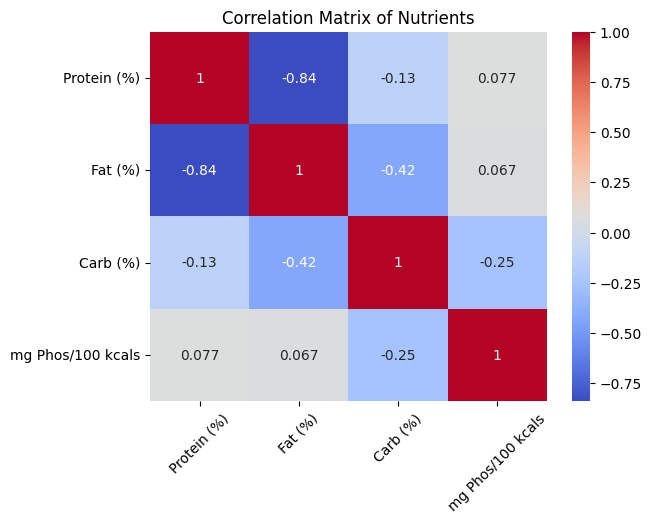

In [28]:
# Plotting the correlation matrix
sns.heatmap(df[nutrients].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Nutrients')
plt.xticks(rotation=45)
plt.show()

# Visualizations & Tables
***
I want to query several different lists from this data:

* Top 5 optimal OTC foods for my cat (greatest spread with less than 7% carbohydrate content)
* Top 10 optimal Prescription foods for my cat
* Top 10 "Junk Foods" available by prescription only
* Top 10 WORST foods for my cat (negative spread)
***

## Top 5 Best OTC Foods for My Cat
***

In [29]:
# Top 5 BEST OTC foods for my cat
top_5_best_otc = df[(df['Carb (%)'] <= 7)].sort_values(by='Spread',ascending=False).head()

top_5_best_otc

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread,Junk Food
1086,Tiki Cat Chicken (No Fish),Koolina Luau,84.0,16.0,0.0,149.0,N/A,N/A,84.0,N/A
1085,Tiki Cat Chicken/Fish,Hookena Luau,82.0,18.0,0.0,245.0,N/A,N/A,82.0,N/A
1084,Weruva Original - Seafood,Mack & Jack,78.0,22.0,0.0,337.0,N/A,N/A,78.0,N/A
1083,Fancy Feast Natural,Natural White Meat Chicken & Flaked Tuna in Broth,77.0,23.0,0.0,343.0,N/A,N/A,77.0,N/A
1082,Tiki Cat Chicken (No Fish),Puka Puka Luau,77.0,23.0,0.0,154.0,N/A,N/A,77.0,N/A


***
1) Tiki Cat Chicken (No Fish)	Koolina Luau

2) Tiki Cat Chicken/Fish	Hookena Luau

3) Weruva Original - Seafood	Mack & Jack

4) Fancy Feast Natural	Natural White Meat Chicken & Flaked Tuna in Broth

5) Tiki Cat Chicken (No Fish)	Puka Puka Luau
***

## Top 10 Best Prescription Foods for My Cat
***

In [30]:
# Top 10 optimal prescription foods for my cat
top_10_prescription_foods = df[(df['Prescription']=='Prescription') & (df['Carb (%)'] <= 7)].sort_values(by='Spread',ascending=True).head(10)

top_10_prescription_foods

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread,Junk Food
393,Royal Canin,Recovery - Feline & Canine,36.0,58.0,3.0,250.0,Prescription,N/A,33.0,N/A
650,Purina Pro Plan Veterinary Diets,DM,43.0,52.0,6.0,297.0,Prescription,N/A,37.0,N/A


***
There are only two.

1) Royal Canin	Recovery - Feline & Canine

2) Purina Pro Plan Veterinary Diets	DM
***

## Top 10 "Junk Foods" Available by Prescription Only
***
The healthiest foods that fall into this category.

In [31]:
# Top 10 Junk Foods available by prescription only
df[(df['Junk Food']=='Junk Food') & (df['Prescription']=='Prescription')].sort_values(by='Spread',ascending=True).head(25)

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread,Junk Food
63,Royal Canin,Dental (DRY),28.0,36.0,36.0,180.0,Prescription,N/A,-8.0,Junk Food
62,Hill's,z/d,28.0,37.0,35.0,157.0,Prescription,N/A,-7.0,Junk Food
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A,-5.0,Junk Food
8,Hill's,k/d Vegetable & Tuna Stew,24.0,47.0,29.0,107.0,Prescription,N/A,-5.0,Junk Food
15,Hill's,l/d,25.0,45.0,30.0,145.0,Prescription,N/A,-5.0,Junk Food
60,Hill's,g/d,28.0,39.0,33.0,123.0,Prescription,N/A,-5.0,Junk Food
5,Hill's,k/d Chicken & Vegetable Stew,23.0,50.0,27.0,105.0,Prescription,N/A,-4.0,Junk Food
6,Hill's,k/d with Ocean Fish,23.0,50.0,27.0,117.0,Prescription,N/A,-4.0,Junk Food
122,Hill's,t/d (DRY),30.0,39.0,31.0,212.0,Prescription,N/A,-1.0,Junk Food


***
There are not 10.

1) Royal Canin	Dental (DRY)

2) Hill's	z/d

3) Hill's	k/d with Chicken

4) Hill's	k/d Vegetable & Tuna Stew

5) Hill's	l/d

6) Hill's	g/d

7) Hill's	k/d Chicken & Vegetable Stew

8) Hill's	k/d with Ocean Fish

9) Hill's	t/d (DRY)
***

## Top 10 WORST Foods for My Cat
***
Foods with a negative spread

In [32]:
# Top 10 WORST foods for my cat
df[df['Spread']<0].sort_values(by='Spread',ascending=True).head(10)

,Company,Flavor/Style,Protein (%),Fat (%),Carb (%),mg Phos/100 kcals,Prescription,Notes,Spread,Junk Food
63,Royal Canin,Dental (DRY),28.0,36.0,36.0,180.0,Prescription,N/A,-8.0,Junk Food
62,Hill's,z/d,28.0,37.0,35.0,157.0,Prescription,N/A,-7.0,Junk Food
2,Hill's,k/d with Chicken,22.0,51.0,27.0,85.0,Prescription,N/A,-5.0,Junk Food
8,Hill's,k/d Vegetable & Tuna Stew,24.0,47.0,29.0,107.0,Prescription,N/A,-5.0,Junk Food
15,Hill's,l/d,25.0,45.0,30.0,145.0,Prescription,N/A,-5.0,Junk Food
60,Hill's,g/d,28.0,39.0,33.0,123.0,Prescription,N/A,-5.0,Junk Food
5,Hill's,k/d Chicken & Vegetable Stew,23.0,50.0,27.0,105.0,Prescription,N/A,-4.0,Junk Food
6,Hill's,k/d with Ocean Fish,23.0,50.0,27.0,117.0,Prescription,N/A,-4.0,Junk Food
102,Nature's Recipe Culinary Favorites - Stew,Beef & Garden Vegetables in Gravy,29.0,41.0,30.0,266.0,N/A,N/A,-1.0,Junk Food
122,Hill's,t/d (DRY),30.0,39.0,31.0,212.0,Prescription,N/A,-1.0,Junk Food


***
We have 10 this time:

1) Royal Canin Dental (DRY)

2) Hill's z/d

3) Hill's k/d with Chicken

4) Hill's k/d Vegetable & Tuna Stew

5) Hill's l/d

6) Hill's g/d

7) Hill's k/d Chicken & Vegetable Stew

8) Hill's k/d with Ocean Fish

9) Nature's Recipe Culinary Favorites - Stew	Beef & Garden Vegetables in Gravy

10) Hill's	t/d (DRY)
***